<center><strong><font color="#ec6969" style="font-size:30px;"> Proyecto 3 IA </font></strong></center>
<br>
<br>

___
<center>
<br>
Alejandro Uscátegui Torres <br> 
Javier Santana <br>
David Pérez <br>
Santiago Barajas
</center>
<br>

___


In [480]:
# import platform

# print("Sistema Operativo:", platform.system())
# print("Nombre del nodo:", platform.node())
# print("Versión del Sistema Operativo:", platform.version())
# print("Tipo de Máquina:", platform.machine())
# print("Procesador:", platform.processor())
# print("Versión de Python:", platform.python_version())

"""_summary_
    
    Sistema Operativo: Windows
    Nombre del nodo: UscateguiTorres
    Versión del Sistema Operativo: 10.0.22631
    Tipo de Máquina: AMD64
    Procesador: Intel64 Family 6 Model 167 Stepping 1, GenuineIntel
    Versión de Python: 3.11.5
    
"""

'_summary_\n    \n    Sistema Operativo: Windows\n    Nombre del nodo: UscateguiTorres\n    Versión del Sistema Operativo: 10.0.22631\n    Tipo de Máquina: AMD64\n    Procesador: Intel64 Family 6 Model 167 Stepping 1, GenuineIntel\n    Versión de Python: 3.11.5\n    \n'

<strong><font color="#2e53b1" style="font-size:30px;"> Parte 1: Modelo De Red Bayesiana </font></strong>

---

**Contexto:**

*Una red Bayesiana es un modelo probabilístico que representa un conjunto de variables y sus dependencias condicionales a través de un gráfico dirigido acíclico (DAG). En este gráfico, los nodos representan variables y las aristas representan relaciones de dependencia directa entre estas variables. Cada nodo tiene una tabla de probabilidad condicional que cuantifica las probabilidades de la variable dadso sus padres en el gráfico.*

*Las redes bayesianas permiten modelar la incertidumbre y pueden ser usadas para realizar inferencias sobre el valor de una variable basándose en el conocimiento de otras.*

Son útiles en el contexto de clasificación, predicción, decisión y diagnosis. Además están basadas en el teorema de Bayes, que como premisa indica que podemos actualizar nuestras creencias sobre un evento basados en nueva información


<strong><font color="#54c38c" style="font-size:20px;"> Desarrollo </font></strong>

---

In [491]:
# Recibimos el nombre de cada nodo y su ubicación desde un archivo json

import json

nodos: dict[str, str] = {}

lista_de_nodos = []

# with open("data/monty_hall/nodos.json") as file:
#     nodos = json.load(file)
    
with open("data/ejemplo_clase/nodos.json") as file:
    nodos = json.load(file)

lista_de_nodos = list(nodos.keys())
# Print the dictionary
# intento de flex
# print(list(map(lambda x: print(f"nombre nodo: {x} \n tabla del nodo: {nodos[x]}"), nodos)))

for nodo in nodos:
    print(f"Nombre del nodo: {nodo} ")
    print(f"Tabla del nodo: {nodos[nodo][0]}")
    print(f"Depende de: {nodos[nodo][1]}")
    print(f"Apunta a: {nodos[nodo][2]}")
    print()

['R', 'M', 'T', 'A']
Nombre del nodo: R 
Tabla del nodo: data/ejemplo_clase/rain.csv
Depende de: []
Apunta a: ['M', 'T']

Nombre del nodo: M 
Tabla del nodo: data/ejemplo_clase/maintenance.csv
Depende de: ['R']
Apunta a: ['T']

Nombre del nodo: T 
Tabla del nodo: data/ejemplo_clase/train.csv
Depende de: ['R', 'M']
Apunta a: ['A']

Nombre del nodo: A 
Tabla del nodo: data/ejemplo_clase/appointment.csv
Depende de: ['T']
Apunta a: []



In [482]:
def crear_tuplas():
    tuplas_aristas_grafo : list[tuple[str,str]] = []
    for nodo in nodos:
        for arista in nodos[nodo][2]:
            tuplas_aristas_grafo.append((nodo, arista))    
    return tuplas_aristas_grafo

In [483]:
# Dependencia necesaria para crear la red Bayesiana
from pgmpy.models import BayesianNetwork

# Se indican las tuplas que componen a la red bayesiana con formato: (origen,destino) dentro de una lista:
tupla_aristas_dirigidas = crear_tuplas()
print(tupla_aristas_dirigidas)

# Se crea el modelo con base a la tupla (no tocar xd)
model = BayesianNetwork(tupla_aristas_dirigidas)

[('R', 'M'), ('R', 'T'), ('M', 'T'), ('T', 'A')]


In [484]:
import pandas as pd

# Función que lee CSVs completos desde la cabecera

def leer_csv(ruta_archivo) -> list[list[float]]:
    df = pd.read_csv(ruta_archivo, header=None)
    return df.values.tolist()


In [485]:
from pgmpy.factors.discrete import TabularCPD

# Se crean las Tablas de Probabilidad Condicional (CPD -> Conditional Probability Distribution) para cada nodo
# Lee los archivos y los carga como grafo

for nodo in nodos:
    
    tabla_nodo = leer_csv(nodos[nodo][0])
    # print(tabla_nodo)
    
    if len(nodos[nodo][1]) != 0:
        # Tomo los nodos de los que existe dependencia
        nodos_fuente: list[str] = []
        
        for nodo_fuente in nodos[nodo][1]:
            nodos_fuente.append(
                len(leer_csv(nodos[nodo_fuente][0]))
            )
            
        # print(nodos[nodo][1])
        # print(nodos_fuente)
        
        cpd = TabularCPD(
            variable=nodo, 
            variable_card=len(tabla_nodo),
            values= tabla_nodo, 
            evidence=nodos[nodo][1], 
            evidence_card=nodos_fuente
            )
        
        model.add_cpds(cpd)
    else:
        cpd = TabularCPD(
            variable=nodo, 
            variable_card=len(tabla_nodo),
            values=tabla_nodo
            )
        model.add_cpds(cpd)
        
model.get_cpds()

[<TabularCPD representing P(R:3) at 0x1e9c4a55550>,
 <TabularCPD representing P(M:2 | R:3) at 0x1e9c73dc6d0>,
 <TabularCPD representing P(T:2 | R:3, M:2) at 0x1e9c0fa7210>,
 <TabularCPD representing P(A:2 | T:2) at 0x1e9c4dec850>]

In [486]:
# check_model check for the model structure and the associated CPD and returns True if everything is correct otherwise throws an exception
model.check_model()

True

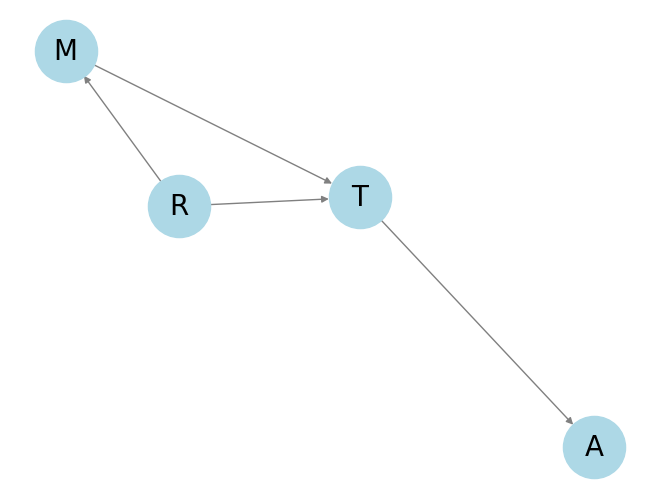

In [487]:
import networkx as nx
import matplotlib.pyplot as plt

# Creamos un grafo dirigido
G = nx.DiGraph()

# Generamos las tuplas a partir 
G.add_edges_from(tupla_aristas_dirigidas)

# Dibujar el grafo
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=20)

# Mostrar el grafo
plt.box(False) 
plt.show()

<strong><font color="#2e53b1" style="font-size:30px;"> Parte 2: Motor de inferencia por enumeración </font></strong>

---

**Contexto:**

*Un motor de inferencia por enumeración es una técnica utilizada en redes bayesianas para calcular probabilidades exactas de eventos específicos. Este enfoque implica enumerar y sumar todas las posibles configuraciones de las variables de una red bayesiana que cumplen con las condiciones especificadas.*

In [488]:
"""_summary_

    Para nuestro código usamos la librería pgmpy que nos permite hacer todas las operaciones necesarias para trabajar con redes bayesianas. Y decidimos utilizar el método de BeliefPropagation
    el cual no es más que un tipo de inferencia usada para calcular la probabilidad de un nodo dado un conjunto de valores de evidencia.
    Sin embargo, también es posible utilizar VariableElimination, que es un método de inferencia que calcula la probabilidad de un nodo dado un conjunto de valores de evidencia también.
    y para hacer esto sólo se debe cambiar la siguiente línea:
    
    infer = BeliefPropagation(model) -> infer = VariableElimination(model)
"""

# Motor de inferencia por enumeración
# from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation

infer = BeliefPropagation(model)

<strong><font color="#2e53b1" style="font-size:30px;"> Configuración del usuario al correr el programa </font></strong>

In [ ]:

"""_summary_

    Se muestra la lista de nodos para indicar el orden en el que se deben solicitar las probabilidades bayesianas.
    Esto se explica a mayor profundidad en el siguiente bloque.
    
    -----------------------------------------------------------------------------------------------
    
    En caso de que la lista de nodos deba modificarse para la inferencia por enumeración (por variables ocultas)
    simplemente se deben indicar en la siguiente línea las variables que quieren tomarse en cuenta:
    
    lista_de_nodos_especificos = [<nodo1>, <nodo2>, <nodo3>, ...]
    
    Así el programa tendrá en cuenta automáticamente las variables ocultas y las variables que se desean inferir.
    (estas no se deben incluir en la lista)
    
    IMPORTANTE:
    
    La variable objetivo debe ir siempre en la primera casilla de la lista
    
    
"""

# Validación
# print(lista_de_nodos)
lista_de_nodos_especificos = []
lista_de_nodos_especificos = ["A", "R", "M"]
probabilidades_bayesianas = infer.query(lista_de_nodos_especificos, evidence={}, joint=True)

# Posibles combinaciones
# print(probabilidades_bayesianas)

In [517]:
"""
    _summary_:
    
    En particular, con base al orden de los valores de la lista de nodos (R,M,T,A) se debe hacer la petición de probabilidades conjuntas
    Para el ejemplo particular de la clase tenemos:
    
    R (rain) {
        0: ninguna
        1: suave
        2: pesada
    }
    
    M (Maintenance) {
        0: sí
        1: no
    }
    
    T (Train) {
        0: a tiempo
        1: retrasado
    }
    
    A (Appointment) {
        0: tomado
        1: perdido
    }
    
    por esto un ejemplo para las probabilidades conjuntas sería:
    
    probabilidades_bayesianas.values[<R>][<M>][<T>][<A>]
    
    Que se puede organizar de la siguiente manera:
    
    posterior_p.values[1][1][1][1]
    
    Que puede traducirse como las probabilidades conjuntas de que:
    
    probabilidades_bayesianas.values[<R: suave>][<M: no>][<T: retrasado>][<A: perdido>]

"""

# Ejemplo básico con variables conjuntas
# print(probabilidades_bayesianas.values[1][1][1][1])

# Ejemplo con inferencia
# print(probabilidades_bayesianas.values[0][1][1])

0.81


In [ ]:
"""
    NORMALIZACIÓN
"""

# El grafo ya se encargó de gestionar las dependencias, nuestro deber en este punto es simplemente indicar cuáles eventos queremos que sucedan:
# Pero para que el algoritmo quede completo se deben indicar todos los estados finales posibles

lista_estados_finales = []

# Obtenemos la cardinalidad de la variable que buscamos
variable_buscada = "A"
cardinalidad_variable_objetivo = probabilidades_bayesianas.get_cardinality([variable_buscada])

# print(cardinalidad_variable_objetivo[variable_buscada])

# Iteramos con base a su cardinalidad la ubicación

for i in range(cardinalidad_variable_objetivo[variable_buscada]):
    lista_estados_finales.append(probabilidades_bayesianas.values[i][1][1])

# print(lista_estados_finales)

# Finalmente, garantizamos que la suma de las probabilidades sea igual a 1, de modo que:
# x (estadofinal1) + x (estadofinal2) + ... + x (estadofinalN) = 1
# Por lo cual debemos despejar x, si sabemos que:
# x(estadofinal1 + estadofinal2 + ... + estadofinalN) = 1
# Sólo debemos dividir 1 entre la suma de la probabilidad de los estados finales, así:

incognita_de_normalizacion = 1 / sum(lista_estados_finales)

In [520]:
"""_summary_

Mostramos el resultado final

"""


for i in range(cardinalidad_variable_objetivo[variable_buscada]):
    print(f"La probabilidad de que el evento {variable_buscada} sea {i} es: \
          {probabilidades_bayesianas.values[i][1][1] * incognita_de_normalizacion}")


La probabilidad de que el evento A sea 0 es:           0.81
La probabilidad de que el evento A sea 1 es:           0.19
